# Use fitsio instead of PyFITS to read outputs from CoLoRe

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt

In [3]:
#Open data file (test file with few quasars)
h = fitsio.FITS('../example_data/raw_colore/test_N1000.fits')

In [4]:
# get information about quasars (TYPE,RA,DEC,Z_COSMO,DZ_RSD)
catalog = h[1].read()
z_qso = catalog['Z_COSMO']
Nq = len(z_qso)
print('# quasars =',Nq)
print(np.min(z_qso),'< z_qso <',np.max(z_qso))

# quasars = 1000
0.19643 < z_qso < 3.74638


In [5]:
# get arraw with redshift in each cell of grid
z = h[4].read()['Z']
Nz=len(z)
print('# cells in grid =',Nz)
print(z[0],'< z <',z[-1])

# cells in grid = 2048
0.000400246 < z < 3.78768


In [6]:
# Get deltas (fluctuation around mean density) and line of sight velocity (actually, dz)
deltas = h[2].read()
velocities = h[3].read()
print(deltas.shape)
print('mean delta',np.mean(deltas))
print(np.min(deltas),'< delta <',np.max(deltas))

(1000, 2048)
mean delta 0.169895
-0.999486 < delta < 259.773


In [7]:
# identify quasars with highest redshift, and get its delta and velocity
id = np.argmax(z_qso)
delta = deltas[id]
velocity = velocities[id]

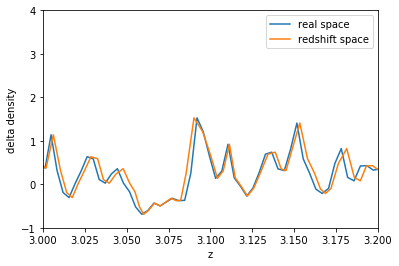

In [8]:
# plot delta for highest-z quasar skewer, vs redshift
plt.xlim(3.0,3.2)
plt.ylim(-1,4)
plt.xlabel('z')
plt.ylabel('delta density')
plt.plot(z,delta,label='real space')
plt.plot(z-velocity,delta,label='redshift space')
plt.legend()